
1. Confusion Matrix and Heatmaps
2. Sensitivity, Specificity, and Precision
3. ROC Curve (TPR vs FPR)
4. Graphs for performance comparison using different models
5. analysis of models using r2
6. normalization and standardization of the related features.

Mortality Prediction In Hospitals
----
----------------------
>*This data contains two groups of patients with each patient's medical information, gender, age, and whther they died or not.*

>*The goal is to predict whether or not a patient is dead or will die based on the data that is provided from each each patient*

**Target Variable** | 'outcome'

---------------------------------
- 0 | Alive
- 1 | Dead

**Gendera** 

------
- 1 | Female
- 2 | Male

**Diabetes | Atrialfibrillation | Hypertensive | CHD with no MI**

-----
- 0 | yes
- 1 | no


In [467]:
from mlwpy import *
%matplotlib inline

import pandas as pd
from collections import deque
import numpy as np

data = pd.read_csv("/Users/hbcuc2-miles/Downloads/mlwpy_code-master/mortality_data.csv")
# print(data)

df = pd.DataFrame({'group':data["group"],
                   'ID':data["ID"],
                   'age':data["age"],
                   'gendera':data['gendera'],
                   'BMI':data['BMI'],
                   'diabetes':data['diabetes'],
                   'atrialfibrillation':data['atrialfibrillation'],
                   'hypertensive':data['hypertensive'],
                   'CHD with no MI':data['CHD with no MI'],
                   'outcome':data["outcome"]})
# df = df.dropna()
display(df.dropna().head(10))
'''
Target Varbibles:
outcome:
0 = Alive
1 = Dead

'''

# Age and BMI are the only data points that needed to normalized within the datset I decided to use

arr_age = np.array([])
arr_BMI = np.array([])
for i in range(len(data)):
    if data.isna()['BMI'][i] != True:
        arr_age = np.append(arr_age, data['age'][i])
        arr_BMI = np.append(arr_BMI, data['BMI'][i])
a_mean = np.mean(arr_age)
b_mean = np.mean(arr_BMI)

print("Age mean: ", np.mean(arr_age))
print("BMI mean: ", np.mean(arr_BMI))
# display(arr_BMI)
# print(len(arr_BMI))
# print(len(arr_age))
# print(len(df.dropna()))

def standard_dev(arr, mean):
    d = 0
    for n in arr:
        d += (n - mean)**2
    return (d / len(arr)) ** 0.5


def standardized_norm(arr, mean, std):
    nums_std = []
    for n in arr:
        nums_std.append((n - mean)/std )
    return nums_std

a_std = standard_dev(arr_age, a_mean)
a_norm = standardized_norm(arr_age, a_mean, a_std)
b_std = standard_dev(arr_BMI, b_mean)
b_norm = standardized_norm(arr_BMI, b_mean, b_std)

print("\n" + "Age standard deviation: ", a_std)
print("BMI standard deviation: ", b_std)
# display(b_norm)

# Formatting the data to have the normalized data included
# Also to make it easier to test, train, and use/access throughout the program
index = df.index
indicies = index[df.isna()['BMI']].tolist()
main_data = []
targets = np.ndarray([])
i = 0
while i < len(df.dropna()):
    # Will add other features (e.g. Blood Sodium, PH, etc.) later
    # Checks to see if its indexing into the right places within the dataset once dropping NaNs    
    if i in indicies:
            main_data.append([data['group'][i+1], data['ID'][i+1], a_norm[i], 
                              data['gendera'][i+1], b_norm[i], data['hypertensive'][i+1], 
                              data['atrialfibrillation'][i+1], data['CHD with no MI'][i+1], data['diabetes'][i+1]])
            targets = np.append(targets, data['outcome'][i])
    else:
        main_data.append([data['group'][i], data['ID'][i], a_norm[i], 
                          data['gendera'][i], b_norm[i], data['hypertensive'][i], 
                          data['atrialfibrillation'][i], data['CHD with no MI'][i], data['diabetes'][i]])
        targets = np.append(targets, data['outcome'][i])
    i += 1
targets = np.delete(targets, 0) # Removed a nulll data point
mortality = sklearn.utils.Bunch(data = main_data, target = targets)
# print(mortality)

,group,ID,age,gendera,BMI,diabetes,atrialfibrillation,hypertensive,CHD with no MI,outcome
0,1,125047,72,1,37.5882,1,0,0,0,0.0000
2,1,109787,83,2,26.5726,0,0,0,0,0.0000
3,1,130587,43,2,83.2646,0,0,0,0,0.0000
4,1,138290,75,2,31.8248,0,0,1,0,0.0000
5,1,154653,76,1,24.2623,0,1,1,0,0.0000
6,1,194420,72,1,39.6674,0,0,1,0,0.0000
7,1,153461,83,2,22.3111,1,1,1,0,0.0000
8,1,113076,61,2,19.9922,1,1,1,0,0.0000
9,1,147252,67,1,45.0320,1,0,1,0,0.0000
10,1,104216,70,2,50.4612,1,0,1,0,0.0000


Age mean:  73.73284823284823
BMI mean:  30.18827765159044

Age standard deviation:  13.52630232049883
BMI standard deviation:  9.321148987791288


In [445]:
(mortality_train_ftrs, mortality_test_ftrs, 
 mortality_train_tgt,  mortality_test_tgt) = skms.train_test_split(mortality.data,
                                                         mortality.target,
                                                         test_size=.33)
knn_preds = neighbors.KNeighborsClassifier().fit(mortality_train_ftrs, mortality_train_tgt).predict(mortality_test_ftrs)
nb_preds = naive_bayes.GaussianNB().fit(mortality_train_ftrs, mortality_train_tgt).predict(mortality_test_ftrs)


# print(len(mortality_test_tgt))
# print(len(mortality_train_tgt))
# display(knn_preds)
# display(nb_preds)

Confusion Matrix and Heatmap
---------
--------------------

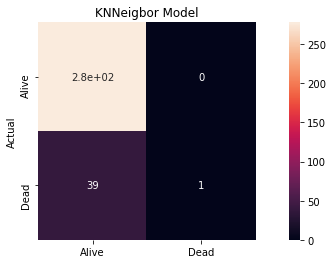

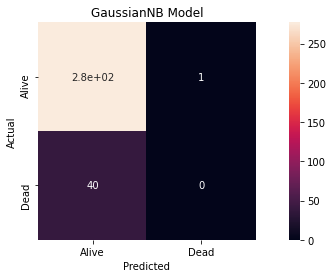

In [446]:
knn_cm = metrics.confusion_matrix(mortality_test_tgt, knn_preds)
nb_cm = metrics.confusion_matrix(mortality_test_tgt, nb_preds)
models_preds = {'knn': knn_cm,
                'nb': nb_cm}
for pred in models_preds:
    fig, axes = plt.subplots(1,1, figsize=(12,4))
    axes = sns.heatmap(models_preds[pred], annot=True, square=True,
                     xticklabels=['Alive', 'Dead'], 
                     yticklabels=['Alive', 'Dead'])
    axes.set_ylabel('Actual');
    if pred == 'nb':
        axes.set_title("GaussianNB Model")
        axes.set_xlabel('Predicted')
    else:
        axes.set_title("KNNeigbor Model")

Precision, Sensitivity, and Specificity
-----
-------------------

In [460]:
print((2*" ")+'knn_cm'+ '\n' +(12*"-"))
print('Sensitivity', knn_cm[0][0]/(knn_cm[0][0]+knn_cm[0][1]))
print('Specificity', knn_cm[1][1]/(knn_cm[1][1]+knn_cm[1][0]))
print('Precision', knn_cm[0][0]/(knn_cm[0][0]+knn_cm[1][0]))
print('\n'+(2*" ")+'nb_cm'+ '\n' +(12*"-"))
print('Sensitivity', nb_cm[0][0]/(nb_cm[0][0]+nb_cm[0][1]))
print('Specificity', nb_cm[1][1]/(nb_cm[1][1]+nb_cm[1][0]))
print('Precision', nb_cm[0][0]/(nb_cm[0][0]+nb_cm[1][0]))

  knn_cm
------------
Sensitivity 1.0
Specificity 0.025
Precision 0.8769716088328076

  nb_cm
------------
Sensitivity 0.9964028776978417
Specificity 0.0
Precision 0.8738170347003155


In [447]:
print((20*" ") + "KNNeighbor"+ '\n' + (50*"-"))
print("accuracy:", metrics.accuracy_score(mortality_test_tgt, 
                                          knn_preds))

print(metrics.classification_report(mortality_test_tgt, 
                                    knn_preds))
print("row counts equal support:", knn_cm.sum(axis=1))

print('\n'+ (20*" ") + "GaussianNB"+ '\n' + (50*"-"))
print("accuracy:", metrics.accuracy_score(mortality_test_tgt, 
                                          nb_preds))

print(metrics.classification_report(mortality_test_tgt, 
                                    nb_preds))
print("row counts equal support:", nb_cm.sum(axis=1))

                    KNNeighbor
--------------------------------------------------
accuracy: 0.8773584905660378
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       278
         1.0       1.00      0.03      0.05        40

    accuracy                           0.88       318
   macro avg       0.94      0.51      0.49       318
weighted avg       0.89      0.88      0.82       318

row counts equal support: [278  40]

                    GaussianNB
--------------------------------------------------
accuracy: 0.8710691823899371
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       278
         1.0       0.00      0.00      0.00        40

    accuracy                           0.87       318
   macro avg       0.44      0.50      0.47       318
weighted avg       0.76      0.87      0.81       318

row counts equal support: [278  40]


ROC Curve and Threshholds
----------
-------------------------------------------

In [448]:
# print(mortality.target)
is_dead = mortality.target == 1
# print(is_dead)
# print(type(dataset['target']))
tts_1 = skms.train_test_split(mortality.data, is_dead, 
                               test_size=.33, random_state = 21)
(mortality_1c_train_ftrs, mortality_1c_test_ftrs, 
 mortality_1c_train_tgt,  mortality_1c_test_tgt) = tts_1

# # build, fit, predict (probability scores) for NB model
prob_true = (naive_bayes.GaussianNB().fit(mortality_1c_train_ftrs, mortality_1c_train_tgt)
                .predict_proba(mortality_1c_test_ftrs)[:,1]) # [:,1]=="True"
print(mortality_1c_test_tgt)
print(prob_true)

[False  True False False False  True False  True False False False False
 False False False False False False False  True False False  True False
 False False False False  True False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False False  True False False False False False False
 False False  True  True False False False  True False False False  True
 False False  True False False False False  True False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False False  True False False Fa

FPR: [0.     0.0036 0.0107 0.0107 0.0214 0.0214 0.0747 0.0747 0.0819 0.0819
 0.1139 0.1139 0.1174 0.1174 0.1246 0.1246 0.1601 0.1601 0.1637 0.1637
 0.1673 0.1673 0.1957 0.1957 0.2242 0.2242 0.2456 0.2456 0.3381 0.3381
 0.3523 0.3523 0.3808 0.3808 0.4057 0.4057 0.4306 0.4306 0.4733 0.4733
 0.4804 0.4804 0.6228 0.6228 0.637  0.637  0.6975 0.6975 0.7367 0.7367
 0.7758 0.7758 0.8007 0.8007 0.8399 0.8399 0.8897 0.8897 0.9181 0.9181
 0.9324 0.9324 0.9715 0.9715 0.9786 0.9786 1.     1.    ]
TPR: [0.     0.     0.     0.027  0.027  0.0541 0.0541 0.0811 0.0811 0.1081
 0.1081 0.1351 0.1351 0.1622 0.1622 0.1892 0.1892 0.2432 0.2432 0.2703
 0.2703 0.2973 0.2973 0.3243 0.3243 0.3514 0.3514 0.3784 0.3784 0.4324
 0.4324 0.4595 0.4595 0.4865 0.4865 0.5135 0.5135 0.5405 0.5405 0.5676
 0.5676 0.5946 0.5946 0.6216 0.6216 0.6486 0.6486 0.6757 0.6757 0.7027
 0.7027 0.7297 0.7297 0.7568 0.7568 0.8108 0.8108 0.8378 0.8378 0.8649
 0.8649 0.8919 0.8919 0.9189 0.9189 0.973  0.973  1.    ]
Threshold: [1.1848 0.1

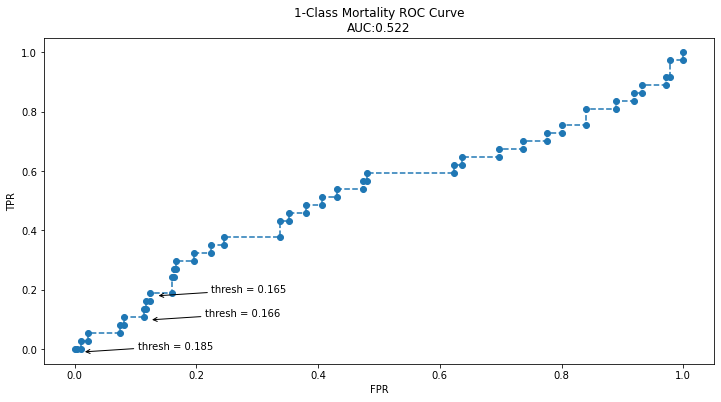

In [452]:
fpr, tpr, thresh = metrics.roc_curve(mortality_1c_test_tgt, 
                                     prob_true)

auc = metrics.auc(fpr, tpr)
#print("FPR : {}".format(fpr), 
#      "TPR : {}".format(tpr), sep='\n')

print(f'FPR: {fpr}')
print(f'TPR: {tpr}')
print(f'Threshold: {thresh}')


# create the main graph
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(fpr, tpr, 'o--')
#ax.set_title("1-Class Iris ROC Curve\nAUC:{:.3f}".format(auc))
ax.set_title(f'1-Class Mortality ROC Curve\nAUC:{auc:.3f}')
ax.set_xlabel("FPR") 
ax.set_ylabel("TPR");

# do a bit of work to label some points with their
# respective thresholds
investigate = np.array([1, 10, 15])
for idx in investigate:
    th, f, t = thresh[idx], fpr[idx], tpr[idx]
    ax.annotate('thresh = {:.3f}'.format(th), 
                xy=(f+.01, t-.01), xytext=(f+.1, t),
                arrowprops = {'arrowstyle':'->'})
#     the poinst are all of the thresholds 

Classifier Cross-Validation Comparison
----------------------------------------------------
----------------------------------------------------------
Observations:
- The GuassianNB model seems to be more accurate compared to the KNN model
 - GuassianNB model is seen to have a higher accuracy than KNN model 5 times on the graph
- GuassianNB model remains consitent in regards to be a certain level of accurate in comparison to the KNN model

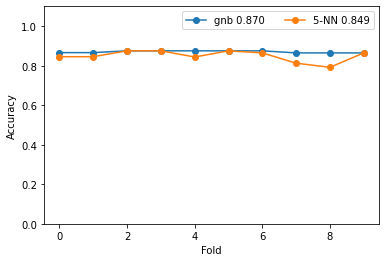

In [454]:
classifiers = {'gnb' : naive_bayes.GaussianNB(),
               '5-NN' : neighbors.KNeighborsClassifier(n_neighbors=5)}


fig, ax = plt.subplots(figsize=(6,4))
for name, model in classifiers.items():
    cv_scores = skms.cross_val_score(model, 
                                     mortality.data, mortality.target, 
                                     cv=10, 
                                     scoring='accuracy', 
                                     n_jobs=-1) # use all cores
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, '-o', label=my_lbl) # marker=next(markers)
ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.legend(ncol=2);

*R^2 isn't used due to fact that is mainly used with Linear regression and this is dealling with classification*